# Create a conda env and install "pipops"
## PipOps:
### It is an AiOps inspired project; Objective to empower DevOps automation with AI/ML capabilities via easy-to-use Python libraries
### Maintained and managed by Vishal Raj ( [Linkedin](https://www.linkedin.com/in/vishal-raj-01baa2197/) )

In [4]:
!pip install pipops

  Using cached pipops-0.1.4.zip (9.3 kB)
  Created wheel for pipops: filename=pipops-0.1.4-py2.py3-none-any.whl size=6674 sha256=8c0405ddccd7b108e9944daae614870e687b5b39967d674f86d7b0de88811429
  Stored in directory: /home/vishalraj/.cache/pip/wheels/6b/14/21/84d5ebc90b88fb8846c70ebb6c1ea61feba781c33c40501801
Successfully built pipops


In [172]:
from pipops import canary

from numpy.random import seed
from numpy.random import randn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import warnings

# Defining the "plot" function

In [173]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [174]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [175]:
seed(1)

# Generate Random merices for both "Baseline" as well as "Canary" deployment

In [184]:
random_data1 = 3 * randn(100) + 70
random_data2 = 3 * randn(100) + 70
baseline_metrices = random_data1.astype(float)
canary_metrices = random_data2.astype(float)

In [185]:
print("Total 'baseline' metrics Quantity --> ", len(baseline_metrices))
print("Total 'canary' metrics Quantity --> ",len(canary_metrices))

Total 'baseline' metrics Quantity -->  100
Total 'canary' metrics Quantity -->  100


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

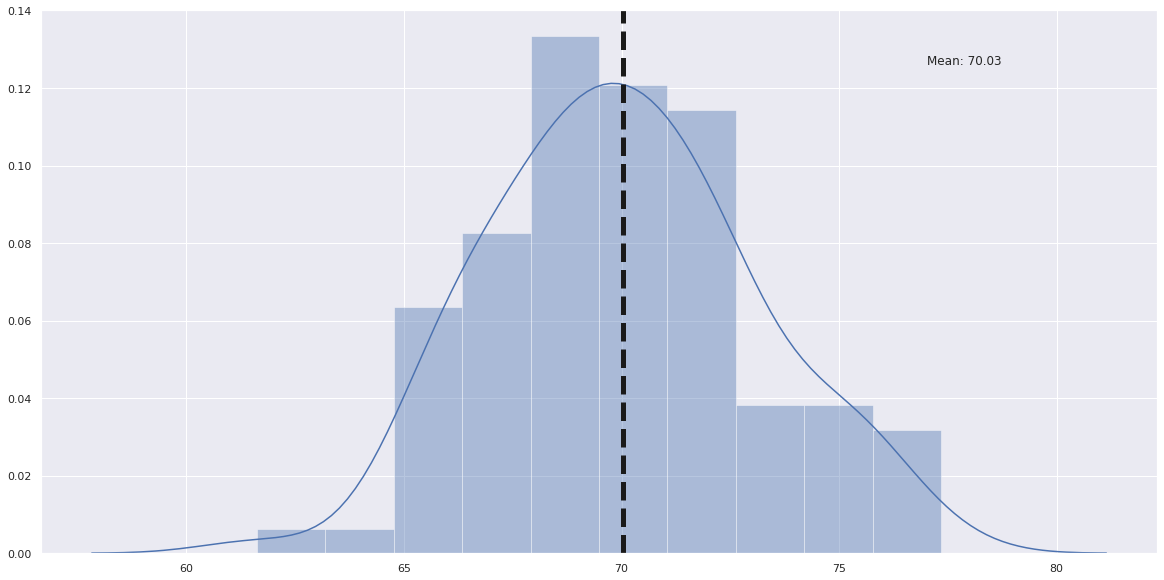

In [186]:
plot_distribution(baseline_metrices)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

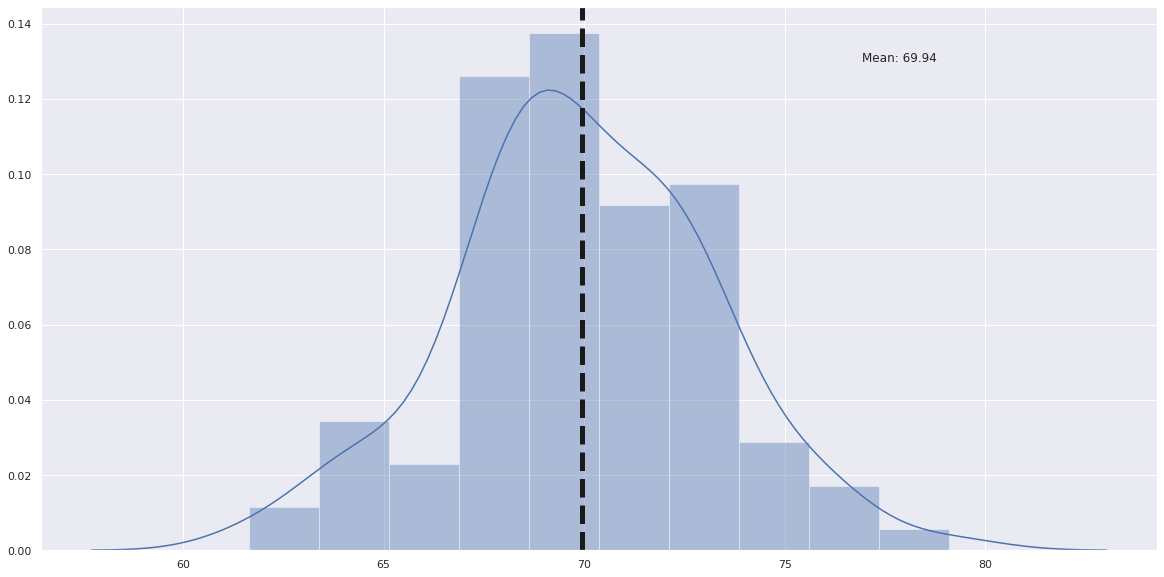

In [187]:
plot_distribution(canary_metrices)

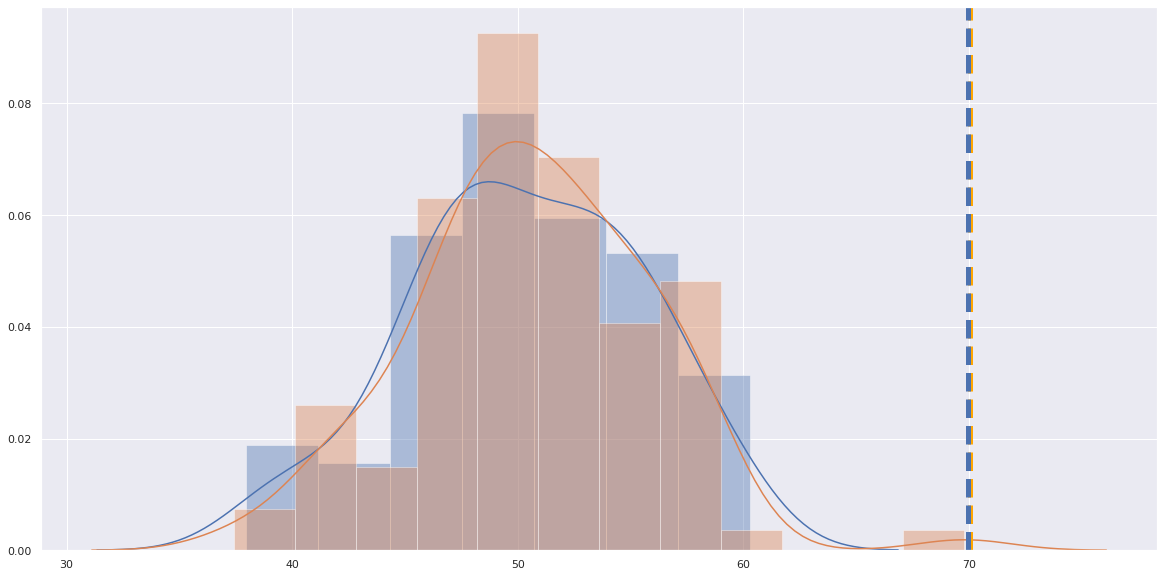

In [188]:
plt.figure()
ax1 = sns.distplot(bs)
ax2 = sns.distplot(cn)
plt.axvline(np.mean(baseline_metrices), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(canary_metrices), color='b', linestyle='dashed', linewidth=5)

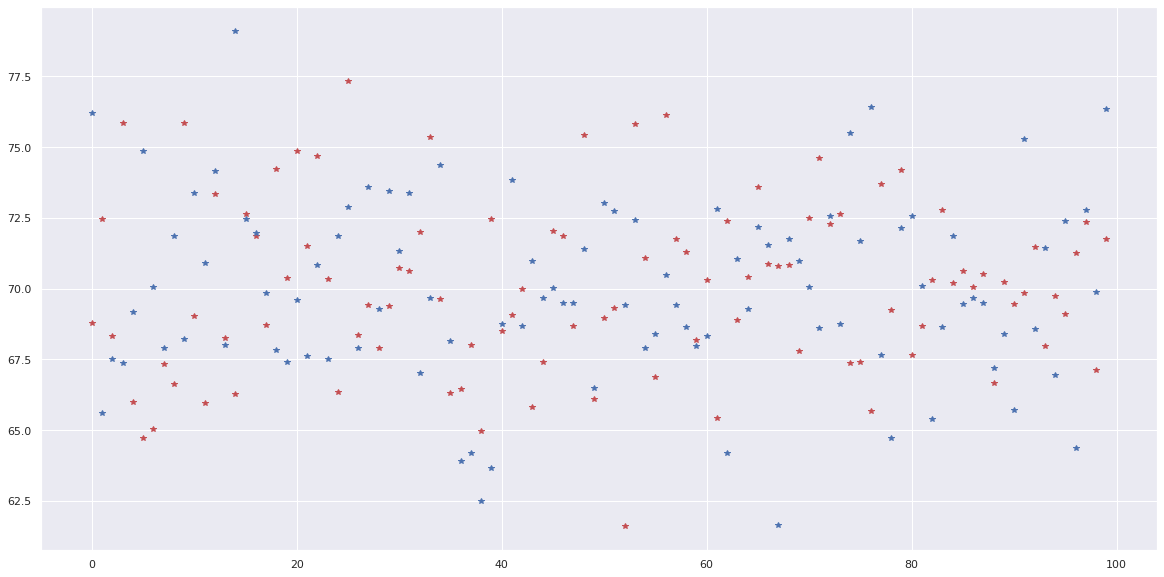

In [189]:
plt.plot(baseline_metrices,'r*', canary_metrices, 'b*')

# Defining tolerance percentage
## In range  ( 1 < tolerance <= 100 ); where 100 means "Allow canary at all cost"
### Whereas when ( tolerance = 75 ) 
#### means: "if the variance between the canary and the baseline overall summation is less than 75% 'Allow Canary' else 'Canary is not allowed, Rollback !'"

In [190]:
tolerance = 75

# canary.analyze_canary()  --> Main canary function
### which takes only "2 distinct array metrices" list for comparision along with the "tolerance" value

### And "returns" 3 distinct outputs, as shown below
### where 
#### "result" --> boolean
#### "variance"  --> int ; "It denotes the overall difference between the two metrices"
#### "description" --> str

In [191]:
result, variance, description = canary.analyze_canary(tolerance, baseline_metrices, canary_metrices)
print(result, variance, description)

True 52 Canary is allowed
